# Importing the Libraries

In [1]:
 import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

# Reading the Data

In [3]:
data=pd.read_csv(r'C:\Users\Saurabh\XYZCorp_LendingData.txt',header=0 ,
                      delimiter="\t", low_memory=False)

data.shape   #(855969, 73)



(855969, 73)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data Visualization

In [5]:
data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [6]:
Non_Default = round(data['default_ind'].value_counts()[0]/len(data) * 100, 2)

Default = round(data['default_ind'].value_counts()[1]/len(data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))

Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default_customer   ||    1 : Default Customer)')

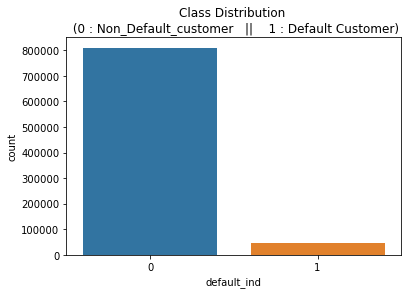

In [7]:
sns.countplot('default_ind', data=data)
plt.title('Class Distribution \n (0 : Non_Default_customer   ||    1 : Default Customer)')

# Term Distribution

Text(0, 0.5, 'Count')

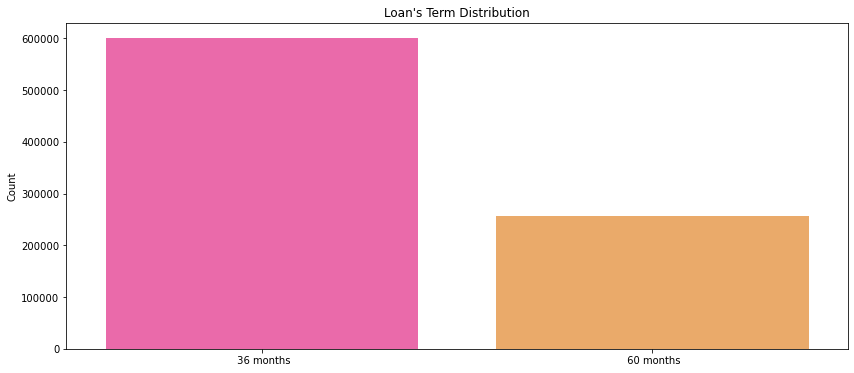

In [8]:
plt.figure(figsize=(14, 6))
sns.barplot(y=data.term.value_counts(), x=data.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

# Amount Distribution

Text(0.5, 1.0, 'Funded Amount Distribution')

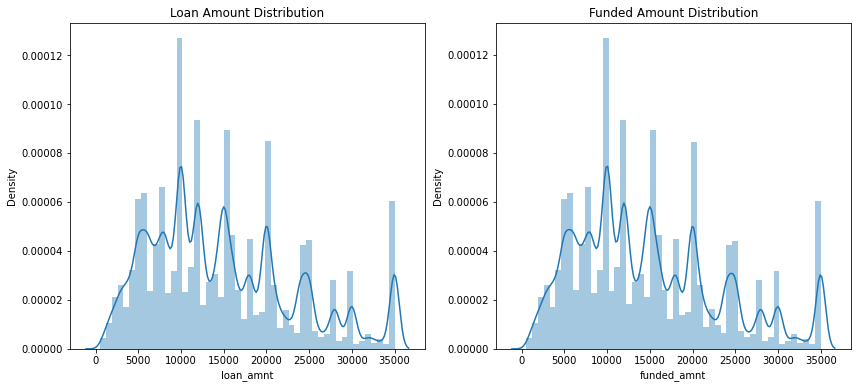

In [9]:

fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

Text(0.5, 1.0, 'Interest Rates Distribution')

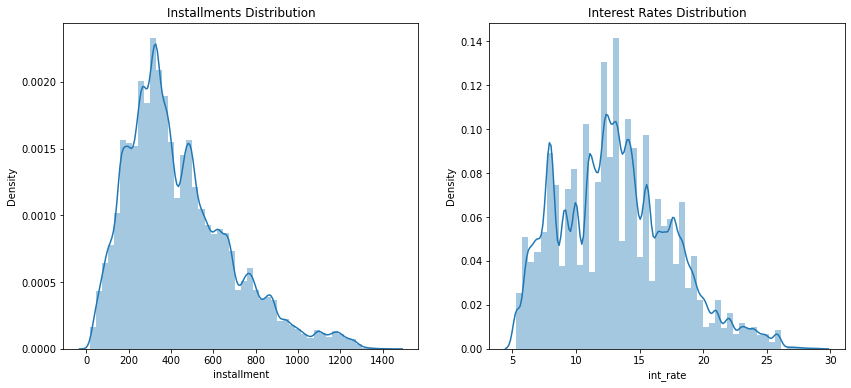

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['installment'], ax=ax[0])
ax[0].set_title("Installments Distribution")

sns.distplot(data['int_rate'], ax=ax[1])
ax[1].set_title("Interest Rates Distribution")

# Data Pre-processing

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


In [12]:

#Feature Selection
# Out of 73 , few variables have a lot of missing values and some are not helpful or 
#impactful in order to build a predictive model, hence dropping.

data.drop(['annual_inc_joint','desc',
            'mths_since_last_record','mths_since_last_major_derog',
            'dti_joint','verification_status_joint','tot_coll_amt','open_acc_6m','open_il_6m','open_il_12m'
            ,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','all_util','inq_fi','inq_last_12m','mths_since_last_delinq','total_cu_tl'],axis=1,inplace=True)

data.shape 
# id variable because its a unique number
data=data.drop('id',axis=1)

# member_id variable because its a unique number
data=data.drop('member_id',axis=1)

# payment_plan variable because it has same value for all observation
data=data.drop('pymnt_plan',axis=1)

# emp_title variable because it's a categorical varibale with (290912 level)
data=data.drop('emp_title',axis=1)

# title variable because it's a categorical varibale with (61000 level)
data=data.drop('title',axis=1)

# addr_state variable for trail purpose (51 level)
data=data.drop('addr_state',axis=1)

In [13]:
# Checking if missing values are present and datatype of each variable.
data.isnull().sum()


loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
t

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   term                        855969 non-null  object 
 4   int_rate                    855969 non-null  float64
 5   installment                 855969 non-null  float64
 6   grade                       855969 non-null  object 
 7   sub_grade                   855969 non-null  object 
 8   emp_length                  812908 non-null  object 
 9   home_ownership              855969 non-null  object 
 10  annual_inc                  855969 non-null  float64
 11  verification_status         855969 non-null  object 
 12  issue_d                     855969 non-null  object 
 13  purpose       

# Missing value Imputation

In [15]:
data['emp_length'].value_counts() 

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [16]:
emp_avg_income = data.groupby('emp_length').annual_inc.agg('mean')
emp_avg_income 

emp_length
1 year       70905.942739
10+ years    82152.634924
2 years      72577.282604
3 years      73437.968649
4 years      73806.577465
5 years      74378.125078
6 years      74309.575394
7 years      74690.965159
8 years      76023.805407
9 years      75746.361255
< 1 year     70475.918204
Name: annual_inc, dtype: float64

In [17]:
def impute_emp_length(cols):
    emp_length = cols[0]
    annual_inc = cols[1]

    if pd.isnull(emp_length):

        if annual_inc < 70800:
            return '< 1 year'

        elif annual_inc in range(70801,72000):
            return '1 year'

        elif annual_inc in range(72000,72800):
            return '2 years'

        elif annual_inc in range(72800,73600):
            return '3 years'

        elif annual_inc in range(73600,74000):
            return '4 years'

        elif annual_inc in range(74000,74500):
            return '5 years'

        elif annual_inc in range(74500,74600):
            return '6 years'

        elif annual_inc in range(74600,74700):
            return '7 years'

        elif annual_inc in range(74700,74800):
            return '8 years'

        elif annual_inc in range(74800,75900):
            return '9 years'

        else:
            return '10+ years'
            

    else:
         return emp_length

In [18]:
data['emp_length'] = data[['emp_length','annual_inc']].apply(impute_emp_length, axis=1) 

In [19]:
data.annual_inc.quantile([0.25,0.5,0.75]) 

0.25    45000.0
0.50    65000.0
0.75    90000.0
Name: annual_inc, dtype: float64

In [20]:
print(data['annual_inc'].min())
print(data['annual_inc'].max()) 

0.0
9500000.0


In [21]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list) 

In [22]:
whiskers = data['annual_inc'] 

In [23]:
labels = ['whiskers'] 

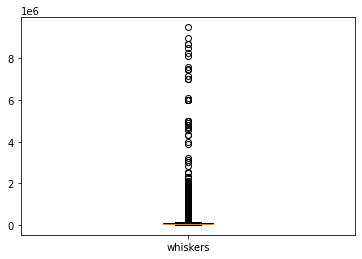

In [24]:
bp = plt.boxplot([whiskers], labels=labels) 

In [25]:
print(get_box_plot_data(labels, bp))
plt.show() 

      label  lower_whisker  lower_quartile   median  upper_quartile  \
0  whiskers            0.0         45000.0  65000.0         90000.0   

   upper_whisker  
0       157500.0  


In [26]:
#creating new vaiable "income_group" with the help of "annual_inc"
#"income_group" consists of 5 classes 
bins = [-1,45000,65000,90000,157500,9500000]
group_names = ['a','b','c','d','e']
data['income_group'] = pd.cut(data['annual_inc'],bins, labels=group_names) 
print(data[['annual_inc','income_group']].head(10)) 

   annual_inc income_group
0     24000.0            a
1     30000.0            a
2     12252.0            a
3     49200.0            b
4     80000.0            c
5     36000.0            a
6     47004.0            b
7     48000.0            b
8     40000.0            a
9     15000.0            a


In [27]:
avg_cur_bal = data.groupby('income_group').annual_inc.agg('mean')
avg_cur_bal

income_group
a     34910.556006
b     55738.297128
c     77613.702677
d    114350.459656
e    235413.156461
Name: annual_inc, dtype: float64

In [28]:
#imputing missing values in "tot_cur_bal" using the variable "income _group" that is created
def impute_cur_bal(cols):
    tot_cur_bal = cols[0]
    income_group = cols[1]

    if pd.isnull(tot_cur_bal):

        if income_group == 'a':
            return 34910.880700

        elif income_group == 'b':
            return 55738.297128

        elif income_group == 'c':
            return 77613.702677

        elif income_group == 'd':
            return 114350.459656

        else:
            return 235413.156461

    else:
        return tot_cur_bal

In [29]:
data['tot_cur_bal'] = data[['tot_cur_bal','income_group']].apply(impute_cur_bal, axis=1) 

In [30]:
# Imputing missing data for categorical variable with mode value

colname1=['verification_status',
          'issue_d','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()


loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
zip_code                          0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [31]:
# Imputing missing data for Numerical with mean value / Zeros 


colname2=['revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape

(855969, 46)

In [32]:
data = data.drop('income_group',axis=1)
data.shape

(855969, 45)

# Converting Categorical Variables into Numerical Ones

In [33]:
# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['grade','term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type','initial_list_status']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,24000.0,2,Dec-2011,1,805,27.65,0.0,263,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,1.0,0,0.0,34910.880700,32163.574526,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1,Dec-2011,0,295,1.00,0.0,41,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,1.0,0,0.0,34910.880700,32163.574526,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0,Dec-2011,11,568,8.72,0.0,570,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,1.0,0,0.0,34910.880700,32163.574526,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,1,5,49200.0,1,Dec-2011,9,851,20.00,0.0,208,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,1.0,0,0.0,55738.297128,32163.574526,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,0,5,80000.0,1,Dec-2011,9,904,17.94,0.0,274,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,1.0,0,0.0,77613.702677,32163.574526,0


# Spliting the Data on the basis of issue Data 

In [34]:

#Train and Test split

# issue_d is object datatype to make use for split converting issue_d in Date

data.issue_d = pd.to_datetime(data.issue_d)   #%y-%m-%d
col_name = 'issue_d'
print (data[col_name].dtype)

#split data in train and test

split_date = "2015-05-01"

train = data.loc[data['issue_d'] <= split_date]
train=train.drop(['issue_d'],axis=1)
#train.head()
train.shape    #(598978, 44)

test = data.loc[data['issue_d'] > split_date]
test=test.drop(['issue_d'],axis=1)
#test.head()
test.shape  #(256991, 44)

datetime64[ns]


(256991, 44)

In [35]:
train.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,24000.0,2,1,805,27.65,0.0,263,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,1.0,0,0.0,34910.880700,32163.574526,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1,0,295,1.00,0.0,41,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,1.0,0,0.0,34910.880700,32163.574526,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0,11,568,8.72,0.0,570,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,1.0,0,0.0,34910.880700,32163.574526,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,1,5,49200.0,1,9,851,20.00,0.0,208,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,1.0,0,0.0,55738.297128,32163.574526,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,0,5,80000.0,1,9,904,17.94,0.0,274,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,1.0,0,0.0,77613.702677,32163.574526,0


In [36]:
test.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,25000.0,0,5.32,752.87,0,0,0,1,150000.0,0,1,46,9.54,0.0,208,0.0,7.0,0.0,19339.0,42.5,18.0,1,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,40,701.14,0,41,0.0,1.0,0,0.0,430856.0,45500.0,0
452273,18000.0,18000.0,18000.0,1,19.48,471.70,4,21,7,5,150000.0,0,2,850,9.39,0.0,398,1.0,18.0,1.0,14052.0,40.7,27.0,1,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,40,335.34,0,41,0.0,1.0,0,0.0,36247.0,34500.0,0
452274,7000.0,7000.0,7000.0,0,7.49,217.72,0,3,1,1,59000.0,0,1,201,13.06,1.0,623,1.0,10.0,0.0,10467.0,24.2,34.0,1,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,1.0,0,0.0,55222.0,43200.0,0
452275,20000.0,20000.0,20000.0,0,17.97,722.75,3,18,7,1,180000.0,0,2,728,25.10,0.0,31,0.0,13.0,0.0,59126.0,92.1,30.0,1,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,1.0,0,0.0,277227.0,64200.0,0
452276,15000.0,15000.0,15000.0,0,6.99,463.09,0,2,2,1,93000.0,0,1,12,14.86,0.0,620,1.0,8.0,0.0,14914.0,43.2,17.0,1,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,1.0,0,0.0,306430.0,34500.0,0


In [37]:
#selecting X and Y

X_train=train.values[:,:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
print(Y_train)

X_test=test.values[:,:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)
print(Y_test)


[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# UDF Function for plotting confusion Matrix

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Greens):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Logistic Regression

In [39]:
#all reg module includes in sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#colname=XYZ_DF_rev.columns[:]
#fitting training data to the model
classifier.fit(X_train,Y_train)
#predicting on Test data
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Confusion Matrix
[[256648     32]
 [    63    248]]


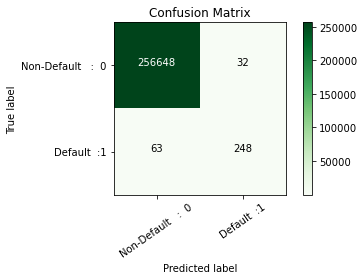

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.89      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9996303372491644


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Random Forest

In [90]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#%%

Confusion Matrix
[[170280  86400]
 [     1    310]]


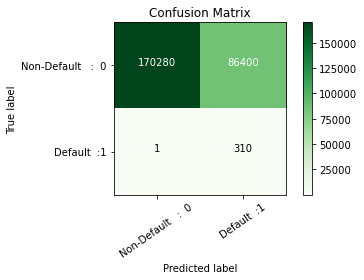

Classification report
              precision    recall  f1-score   support

           0       1.00      0.66      0.80    256680
           1       0.00      1.00      0.01       311

    accuracy                           0.66    256991
   macro avg       0.50      0.83      0.40    256991
weighted avg       1.00      0.66      0.80    256991

Accuracy of the model: 0.6637975648952688


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Decision_Tree_Classifier

In [92]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)


Confusion Matrix
[[250726   5954]
 [     9    302]]


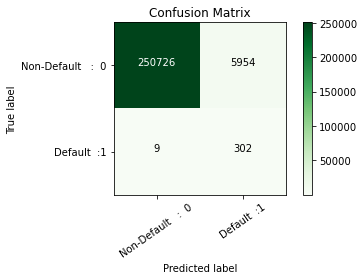

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model: 0.976796852808075


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

In [84]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion = 'gini',min_samples_split=2,random_state=50,class_weight='balanced'
                                         ,max_depth=30)
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)


Confusion Matrix
[[250722   5958]
 [     9    302]]


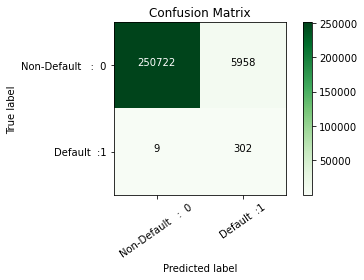

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model: 0.9767812880606714


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# GRadient Boosting Classifier

In [94]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

Confusion Matrix
[[256621     59]
 [    10    301]]


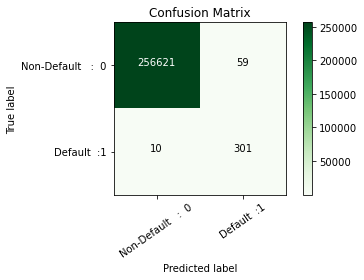

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.84      0.97      0.90       311

    accuracy                           1.00    256991
   macro avg       0.92      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997315081072878


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# ANN

Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

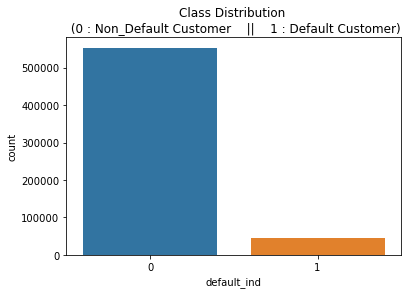

In [96]:
sns.countplot('default_ind', data=train)

plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

In [97]:
nd = round(train['default_ind'].value_counts()[0]/len(train) * 100, 2)

d = round(train['default_ind'].value_counts()[1]/len(train) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(nd))
print('Default Customer : {} % of the dataset'.format(d))

Non_Default Customer : 92.29 % of the dataset
Default Customer : 7.71 % of the dataset


In [98]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, early_stopping=True,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True,n_iter_no_change=5)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Iteration 1, loss = 0.43708777
Validation score: 0.995375
Iteration 2, loss = 0.08888506
Validation score: 0.968413
Iteration 3, loss = 0.04470271
Validation score: 0.994524
Iteration 4, loss = 0.13269144
Validation score: 0.957595
Iteration 5, loss = 0.26714475
Validation score: 0.923370
Iteration 6, loss = 0.27263886
Validation score: 0.923320
Iteration 7, loss = 0.27289487
Validation score: 0.923236
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


Confusion Matrix
[[255831    849]
 [    63    248]]


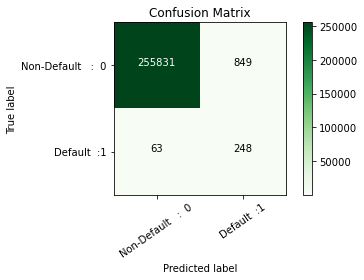

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.23      0.80      0.35       311

    accuracy                           1.00    256991
   macro avg       0.61      0.90      0.68    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.996451237591978


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Out of all the models we have tried Gradient Boosting provides the Best accuaracy and the recall factor